In [2]:
import sys, os
import re
from collections import defaultdict
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina', 'png')
from matplotlib.patches import Rectangle, Polygon
import seaborn as sns
sns.set_style('white')

import geneinfo as gi
gi.email('ariadna.saez@alum.esci.upf.edu')


# # for use on the cluster
#%env ftp_proxy http://proxy-default:3128

%env http_proxy=http://proxy-default:3128
# %env https_proxy=http://proxy-default:3128
# %env ftp_proxy=http://proxy-default:3128
# %env ftps_proxy=http://proxy-default:3128

env: http_proxy=http://proxy-default:3128


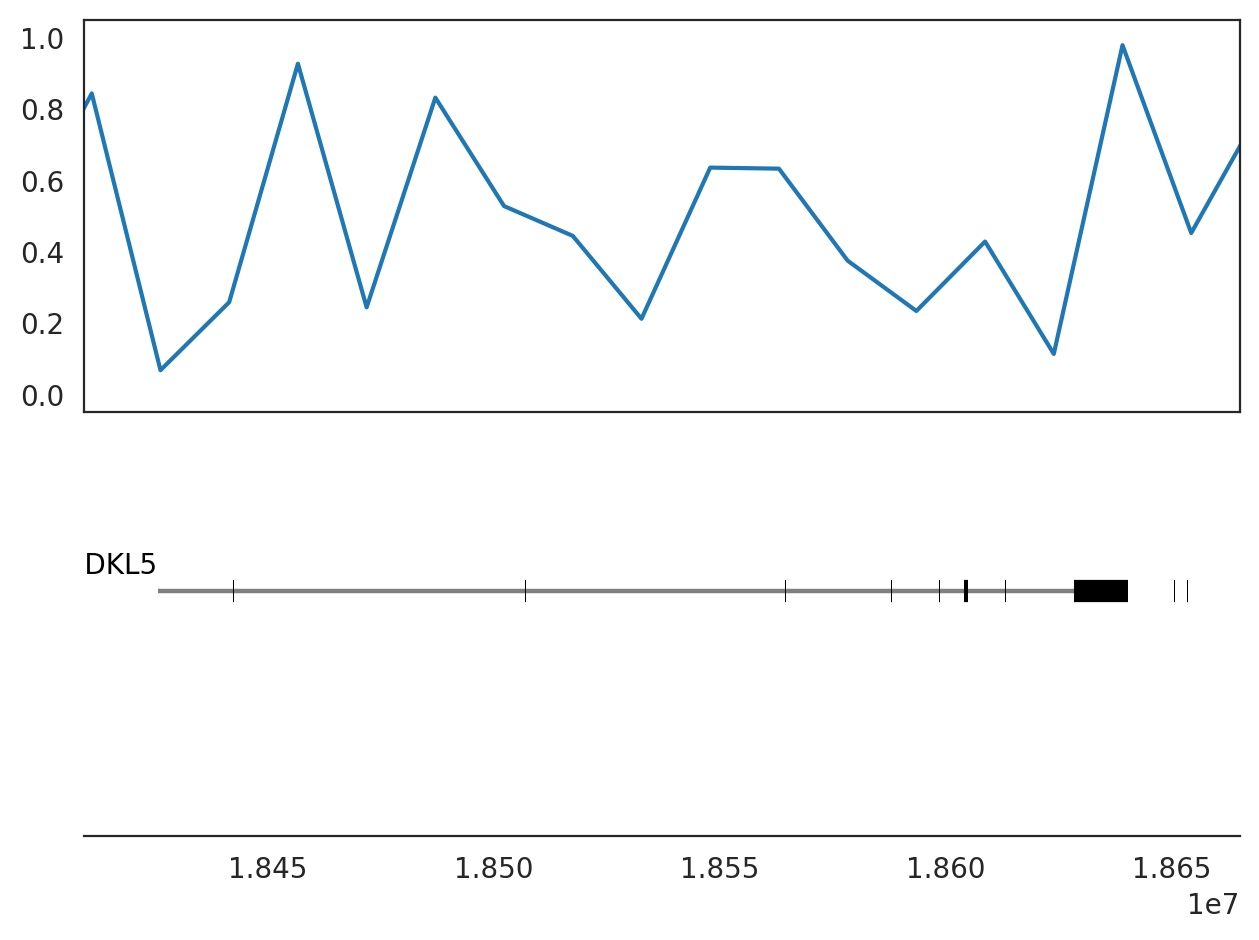

In [3]:
x = np.linspace(1, 1520300000, 100000)
y = np.random.random(100000)
ax = gi.gene_plot('chrX', 18420000, 18480000,'hg38')
ax.plot(x, y)
plt.tight_layout()

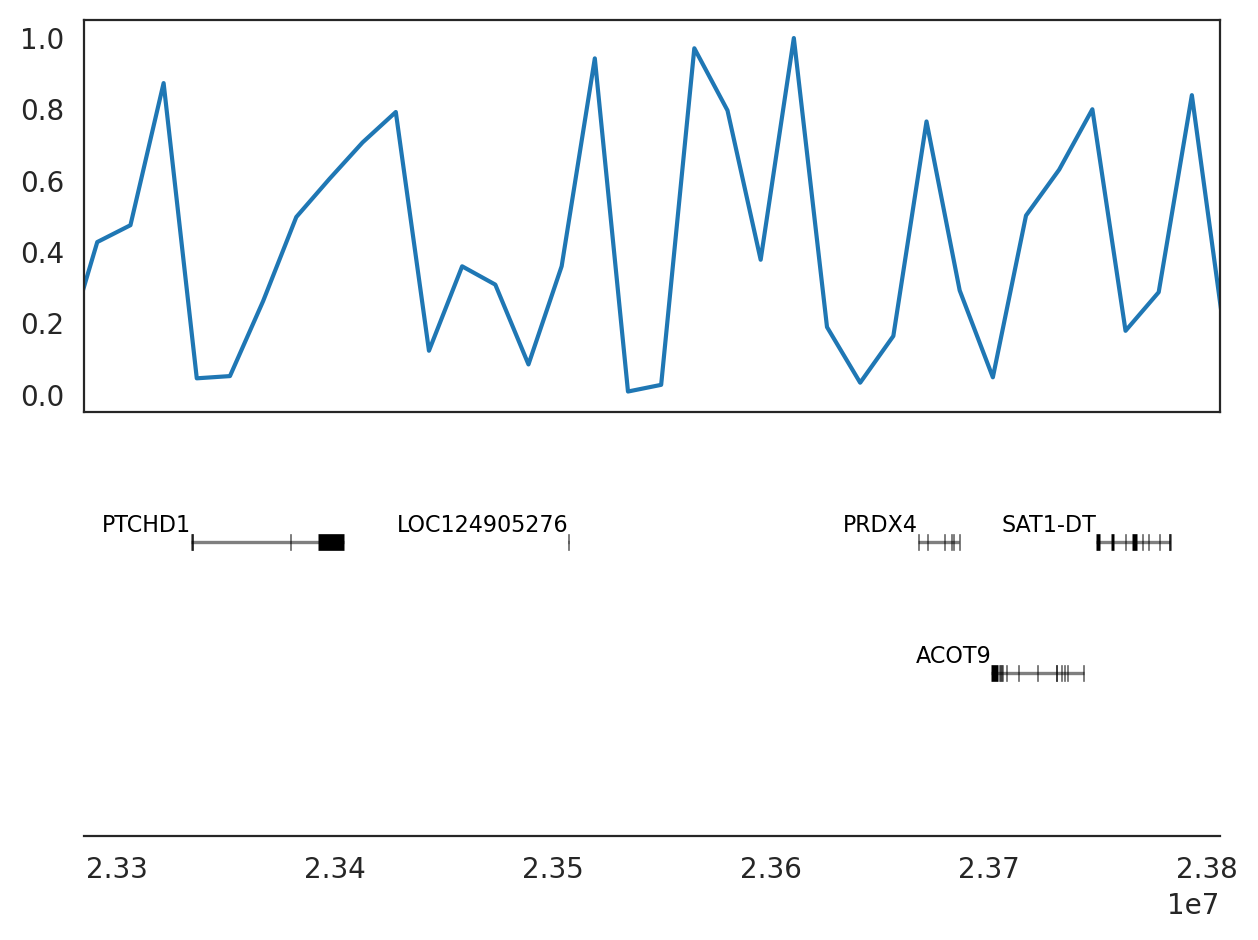

In [4]:
x = np.linspace(1, 1520300000, 100000)
y = np.random.random(100000)
ax = gi.gene_plot('chrX', 23371000, 23776000,'hg38')
ax.plot(x, y)
plt.tight_layout()

In [10]:
# just take SNPs above the threshold
all_data = pd.read_csv("/home/ari/ari-intern/people/ari/ariadna-intern/notebooks/africans_low_pvalue.csv")

data = all_data.iloc[:, [0, -2, -1]]

# just take needed columns
print(data)

         pos  when_mutation_has_freq2 population
0   17951099                 -6.61750        LWK
1   20315815                 -9.37493        LWK
2   20317564                 -7.23160        LWK
3   23370843                 -7.05065        LWK
4   10433671                 -6.72735        ESN
5   18440969                 -6.37140        ESN
6   18447244                 -6.16464        ESN
7   18481819                 -6.16464        ESN
8   18483252                 -6.16464        ESN
9   35325695                 -6.15811        ESN
10  35509359                 -6.66346        ESN
11   5444732                 -6.25964        GWD
12  19973392                 -6.06747        GWD
13  20142128                 -6.37256        GWD
14  22782732                 -6.77959        GWD
15  23375979                 -6.52224        GWD
16  28922431                 -6.60946        GWD
17  32189472                 -6.73376        GWD
18  33908763                 -6.24183        MSL
19   3614834        

In [7]:
# Function to definne window to search nearby genes
def get_window_range(position, window_size):
    x_min = position - window_size // 2
    x_max = position + window_size // 2
    return x_min, x_max

# Define populations
populations = data['population'].unique()

# Dictionary to store gene regions for each population
gene_regions = {}

# Set to store unique gene symbols
unique_genes = set()

# Iterate over populations
for population in populations:
    # Filter data for the current population
    population_data = data[data['population'] == population]
    
    # Initialize a list to store gene regions for the current population
    population_gene_regions = []
    
    # Iterate over rows and calculate gene regions
    for index, row in population_data.iterrows():
        genomic_position = row['pos']
        window_size = 1000  # Set window size 
        x_min, x_max = get_window_range(genomic_position, window_size)
        
        # Call gi.get_genes_region() for the current region
        gene_region = gi.get_genes_region('chrX', x_min, x_max, assembly='hg38')
        
        # Extract gene symbol, start position, and end position from the result
        if gene_region:  # Check if gene_region is not empty
            gene_symbol = gene_region[0][0]
            start_position = gene_region[0][1]
            end_position = gene_region[0][2]
            
            # Append the extracted information to the list of gene regions for the current population
            population_gene_regions.append((gene_symbol, start_position, end_position))
            
            # Add gene symbol to set of unique genes
            unique_genes.add(gene_symbol)
    
    # Store the list of gene regions for the current population in the dictionary
    gene_regions[population] = population_gene_regions

# Print gene regions for all populations
for population, regions in gene_regions.items():
    print(f"Gene regions for {population}:")
    for region in regions:
        print(region)

print()
print()

# Set to store gene symbols for which information has already been retrieved
retrieved_symbols = set()

# Run gi.gene_info() for each unique gene symbol
for gene_symbol in unique_genes:
    # Check if gene information has already been retrieved for this symbol
    if gene_symbol not in retrieved_symbols:
        gene_info = gi.gene_info(gene_symbol)
        if gene_info is not None:
            print(f"Gene info for {gene_symbol}: {gene_info}")

Gene regions for LWK:
('PTCHD1', 23334395, 23404374)
Gene regions for ESN:
('CDKL5', 18425607, 18640196)
('CDKL5', 18425607, 18640196)
('CDKL5', 18425607, 18640196)
('CDKL5', 18425607, 18640196)
Gene regions for GWD:
('BCLAF3', 19912859, 19988498)
('EIF1AX', 20124524, 20141838)
('PTCHD1-AS', 22193004, 23293146)
('PTCHD1', 23334395, 23404374)
('IL1RAPL1', 28587445, 29956718)
('DMD', 31119221, 32412228)
Gene regions for MSL:
('LOC105373153', 33726365, 34077114)
Gene regions for YRI:
('PRKX', 3604339, 3713649)
('CDKL5', 18425607, 18640196)
('PTCHD1', 23334395, 23404374)




**Symbol:** **_CDKL5_** (protein-coding) &nbsp; &nbsp; &nbsp; &nbsp; **Aliases:** CFAP247, DEE2, EIEE2, ISSX, STK9  
*cyclin dependent kinase like 5*  
**Summary:** This gene is a member of Ser/Thr protein kinase family and encodes a phosphorylated protein with protein kinase activity. Mutations in this gene have been associated with X-linked infantile spasm syndrome (ISSX), also known as X-linked West syndrome, and Rett syndrome (RTT). Alternate transcriptional splice variants have been characterized. [provided by RefSeq, Jul 2008].  
**Genomic position:** X:18425583-18653629 (hg38), X:18443703-18671749 (hg19)  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=CDKL5)  


 ----

**Symbol:** **_DMD_** (protein-coding) &nbsp; &nbsp; &nbsp; &nbsp; **Aliases:** BMD, CMD3B, DXS142, DXS164, DXS206, DXS230, DXS239, DXS268, DXS269, DXS270, DXS272, MRX85  
*dystrophin*  
**Summary:** This gene spans a genomic range of greater than 2 Mb and encodes a large protein containing an N-terminal actin-binding domain and multiple spectrin repeats. The encoded protein forms a component of the dystrophin-glycoprotein complex (DGC), which bridges the inner cytoskeleton and the extracellular matrix. Deletions, duplications, and point mutations at this gene locus may cause Duchenne muscular dystrophy (DMD), Becker muscular dystrophy (BMD), or cardiomyopathy. Alternative promoter usage and alternative splicing result in numerous distinct transcript variants and protein isoforms for this gene. [provided by RefSeq, Dec 2016].  
**Genomic position:** X:31097677-33339609 (hg38), X:31115794-33357558 (hg19)  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=DMD)  


 ----

**Symbol:** **_PTCHD1-AS_**   
*PTCHD1 antisense RNA (head to head)*  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=PTCHD1-AS)  


 ----

**Symbol:** **_PRKX_** (protein-coding) &nbsp; &nbsp; &nbsp; &nbsp; **Aliases:** PKX1  
*protein kinase cAMP-dependent X-linked catalytic subunit*  
**Summary:** This gene encodes a serine threonine protein kinase that has similarity to the catalytic subunit of cyclic AMP dependent protein kinases. The encoded protein is developmentally regulated and may be involved in renal epithelial morphogenesis. This protein may also be involved in macrophage and granulocyte maturation. Abnormal recombination between this gene and a related pseudogene on chromosome Y is a frequent cause of sex reversal disorder in XX males and XY females. Pseudogenes of this gene are found on chromosomes X, 15 and Y. [provided by RefSeq, Feb 2010].  
**Genomic position:** X:3604340-3713649 (hg38), X:3522411-3631649 (hg19)  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=PRKX)  


 ----

**Symbol:** **_PTCHD1_** (protein-coding) &nbsp; &nbsp; &nbsp; &nbsp; **Aliases:** AUTSX4, CXDELp22.11, DELXP22.11  
*patched domain containing 1*  
**Summary:** This gene encodes a membrane protein with a patched domain. The encoded protein is similar to Drosophila proteins which act as receptors for the morphogen sonic hedgehog. Deletions in this gene, which is located on the X chromosome, are associated with intellectual disability and autism (PMID: 21091464, PMID: 20844286). [provided by RefSeq, Aug 2011].  
**Genomic position:** X:23334849-23404374 (hg38), X:23352133-23422489 (hg19)  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=PTCHD1)  


 ----

**Symbol:** **_EIF1AX_** (protein-coding) &nbsp; &nbsp; &nbsp; &nbsp; **Aliases:** EIF1A, EIF1AP1, EIF4C, eIF-1A, eIF-4C  
*eukaryotic translation initiation factor 1A X-linked*  
**Summary:** This gene encodes an essential eukaryotic translation initiation factor. The protein is required for the binding of the 43S complex (a 40S subunit, eIF2/GTP/Met-tRNAi and eIF3) to the 5' end of capped RNA. [provided by RefSeq, Jul 2008].  
**Genomic position:** X:20124525-20141838 (hg38), X:20142636-20159962 (hg19)  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=EIF1AX)  


 ----

**Symbol:** **_LOC105373153_** (ncRNA)  
*uncharacterized LOC105373153*  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=LOC105373153)  


 ----

**Symbol:** **_IL1RAPL1_** (protein-coding) &nbsp; &nbsp; &nbsp; &nbsp; **Aliases:** IL-1-RAPL-1, IL-1RAPL-1, IL1R8, IL1RAPL, IL1RAPL-1, MRX10, MRX21, MRX34, OPHN4, TIGIRR-2  
*interleukin 1 receptor accessory protein like 1*  
**Summary:** The protein encoded by this gene is a member of the interleukin 1 receptor family and is similar to the interleukin 1 accessory proteins. This protein has an N-terminal signal peptide, three extracellular immunoglobulin Ig-like domains, a transmembrane domain, an intracellular Toll/IL-1R domain, and a long C-terminal tail which interacts with multiple signalling molecules. This gene is located at a region on chromosome X that is associated with a non-syndromic form of X-linked intellectual disability. Deletions and mutations in this gene were found in patients with intellectual disability. This gene is expressed at a high level in post-natal brain structures involved in the hippocampal memory system, which suggests a specialized role in the physiological processes underlying memory and learning abilities, and plays a role in synapse formation and stabilization. [provided by RefSeq, Jul 2017].  
**Genomic position:** X:28587446-29956718 (hg38), X:28605516-29974840 (hg19)  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=IL1RAPL1)  


 ----

**Symbol:** **_BCLAF3_** (protein-coding) &nbsp; &nbsp; &nbsp; &nbsp; **Aliases:** CXorf23  
*BCLAF1 and THRAP3 family member 3*  
**Summary:** Predicted to enable DNA binding activity and transcription coregulator activity. Predicted to be involved in positive regulation of transcription by RNA polymerase II. Predicted to be located in mitochondrion. Predicted to be part of mediator complex. [provided by Alliance of Genome Resources, Apr 2022]  
**Genomic position:** X:19912860-19991061 (hg38), X:19930978-19988416 (hg19)  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=BCLAF3)  


 ----

In [31]:
# first of all make p-values be 0-1
# take values and put them in a list !!!

#ax = gi.gene_plot('chrX', 23330000, 23404374, 'hg38')
lwk_data = data.loc[data['population'] == 'LWK']
print(lwk_data)
lwk_data['value10'] = lwk_data['when_mutation_has_freq2'] / 10


#print(lwk__data)
#ax.plot(lwk_data['pos'], -(lwk_data['when_mutation_has_freq2'])) 
#plt.tight_layout()

        pos  when_mutation_has_freq2 population
0  17951099                 -6.61750        LWK
1  20315815                 -9.37493        LWK
2  20317564                 -7.23160        LWK
3  23370843                 -7.05065        LWK


/scratch/36480832/ipykernel_3933969/3681205508.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lwk_data['value10'] = lwk_data['when_mutation_has_freq2'] / 10
